## import prepared city list.

In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np

# read back prepared city list
city_coord_file = "Resources/city_coord.csv"
city_coord_df = pd.read_csv(city_coord_file)
city_coord_df.head(2)

,Unnamed: 0,City,Lat,Lng
0,0,nouadhibou,23.727049,-21.318776
1,1,yellowknife,63.227112,-108.372052


In [2]:
## ensure it is python list
cities = city_coord_df["City"].tolist()
cities[0:2]

['nouadhibou', 'yellowknife']

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# California cities
califoria_cities = [
    "Alameda", "Alhambra", "Anaheim", "Antioch", "Arcadia",
    "Bakersfield", "Barstow", "Belmont", "Berkeley", "Beverly Hills", "Brea", "Buena Park", "Burbank",
    "Calexico", "Calistoga", "Carlsbad", "Carmel", "Chico", "Chula Vista", "Claremont", "Compton", "Concord",
        "Corona", "Coronado", "Costa Mesa", "Culver City",
    "Daly City", "Davis", "Downey",
    "El Centro", "El Cerrito", "El Monte", "Escondido", "Eureka",
    "Fairfield", "Fontana", "Fremont", "Fresno", "Fullerton",
    "Garden Grove", "Glendale",
    "Hayward", "Hollywood", "Huntington Beach",
    "Indio", "Inglewood", "Irvine",
    "La Habra", "Laguna Beach", "Lancaster", "Livermore", "Lodi", "Lompoc", "Long Beach", "Los Angeles",
    "Malibu", "Martinez", "Marysville", "Menlo Park", "Merced", "Modesto", "Monterey", "Mountain View",
    "Napa", "Needles", "Newport Beach", "Norwalk", "Novato",
    "Oakland", "Oceanside", "Ojai", "Ontario", "Orange", "Oroville", "Oxnard",
    "Pacific Grove", "Palm Springs", "Palmdale", "Palo Alto", "Pasadena", "Petaluma", "Pomona", "Port Hueneme",
    "Rancho Cucamonga", "Red Bluff", "Redding", "Redlands", "Redondo Beach", "Redwood City", "Richmond", "Riverside", "Roseville",
    "Sacramento", "Salinas", "San Bernardino", "San Clemente", "San Diego", "San Fernando", "San Francisco",
        "San Gabriel", "San Jose", "San Juan Capistrano", "San Leandro", "San Luis Obispo", "San Marino", "San Mateo",
        "San Pedro", "San Rafael", "San Simeon", "Santa Ana", "Santa Barbara", "Santa Clara", "Santa Clarita",
        "Santa Cruz", "Santa Monica", "Santa Rosa", "Sausalito", "Simi Valley", "Sonoma", "South San Francisco",
        "Stockton", "Sunnyvale", "Susanville",
    "Thousand Oaks", "Torrance", "Turlock",
    "Ukiah",
    "Vallejo", "Ventura", "Victorville", "Visalia",
    "Walnut Creek", "Watts", "West Covina", "Whittier", "Woodland",
    "Yorba Linda", "Yuba City"]
massachusetts_cities = [
    "Abington", "Adams", "Amesbury", "Amherst", "Andover", "Arlington", "Athol", "Attleboro",
    "Barnstable", "Bedford", "Beverly", "Boston", "Bourne", "Braintree", "Brockton", "Brookline",
    "Cambridge", "Canton", "Charlestown", "Chelmsford", "Chelsea", "Chicopee", "Clinton", "Cohasset", "Concord",
    "Danvers", "Dartmouth", "Dedham", "Dennis", "Duxbury",
    "Eastham", "Edgartown", "Everett",
    "Fairhaven", "Fall River", "Falmouth", "Fitchburg", "Framingham",
    "Gloucester", "Great Barrington", "Greenfield", "Groton",
    "Harwich", "Haverhill", "Hingham", "Holyoke", "Hyannis",
    "Ipswich", "Lawrence", "Lenox", "Leominster", "Lexington",
    "Lowell", "Ludlow", "Lynn",
    "Malden", "Marblehead", "Marlborough", "Medford", "Milton",
    "Nahant", "Natick", "New Bedford", "Newburyport", "Newton", "North Adams", "Northampton", "Norton", "Norwood",
    "Peabody", "Pittsfield", "Plymouth", "Provincetown",
    "Quincy",
    "Randolph", "Revere",
    "Salem", "Sandwich", "Saugus", "Somerville", "South Hadley", "Springfield", "Stockbridge", "Stoughton", "Sturbridge", "Sudbury",
    "Taunton", "Tewksbury", "Truro",
    "Watertown", "Webster", "Wellesley", "Wellfleet", "West Bridgewater", "West Springfield", "Westfield",
        "Weymouth", "Whitman", "Williamstown", "Woburn", "Woods Hole", "Worcester"]
florida_cities = [
    "Apalachicola",
    "Bartow", "Belle Glade", "Boca Raton", "Bradenton",
    "Cape Coral", "Clearwater", "Cocoa Beach", "Cocoa-Rockledge", "Coral Gables",
    "Daytona Beach", "De Land", "Deerfield Beach", "Delray Beach",
    "Fernandina Beach", "Fort Lauderdale", "Fort Myers", "Fort Pierce", "Fort Walton Beach",
    "Gainesville",
    "Hallandale Beach", "Hialeah", "Hollywood", "Homestead",
    "Jacksonville",
    "Key West",
    "Lake City", "Lake Wales", "Lakeland", "Largo",
    "Melbourne", "Miami", "Miami Beach",
    "Naples", "New Smyrna Beach",
    "Ocala", "Orlando", "Ormond Beach",
    "Palatka", "Palm Bay", "Palm Beach", "Panama City", "Pensacola", "Pompano Beach",
    "Saint Augustine", "Saint Petersburg", "Sanford", "Sarasota", "Sebring",
    "Tallahassee", "Tampa", "Tarpon Springs", "Titusville",
    "Venice",
    "West Palm Beach", "White Springs", "Winter Haven", "Winter Park"]
hawaii_cities = [
    "Hanalei", "Hilo", "Honaunau", "Honolulu",
    "Kahului", "Kaneohe", "Kapaa", "Kawaihae",
    "Lahaina", "Laie", "Wahiawa", "Wailuku", "Waimea"]
texas_cities = [
    "Abilene", "Alpine", "Amarillo", "Arlington", "Austin",
    "Baytown", "Beaumont", "Big Spring", "Borger", "Brownsville", "Bryan",
    "Canyon", "Cleburne", "College Station", "Corpus Christi", "Crystal City",
    "Dallas", "Del Rio", "Denison", "Denton",
    "Eagle Pass", "Edinburg", "El Paso",
    "Fort Worth", "Freeport",
    "Galveston", "Garland", "Goliad", "Greenville",
    "Harlingen", "Houston", "Huntsville",
    "Irving",
    "Johnson City",
    "Kilgore", "Killeen", "Kingsville",
    "Laredo", "Longview", "Lubbock", "Lufkin",
    "Marshall", "McAllen", "McKinney", "Mesquite", "Midland", "Mission",
    "Nacogdoches", "New Braunfels",
    "Odessa", "Orange",
    "Pampa", "Paris", "Pasadena", "Pecos", "Pharr", "Plainview", "Plano", "Port Arthur", "Port Lavaca",
    "Richardson",
    "San Angelo", "San Antonio", "San Felipe", "San Marcos", "Sherman", "Sweetwater",
    "Temple", "Texarkana", "Texas City", "Tyler",
    "Uvalde",
    "Victoria",
    "Waco", "Weatherford", "Wichita Falls",
    "Ysleta"]
# that is all, use only if not prepared.
if not cities: 
    cities = califoria_cities + massachusetts_cities + florida_cities + hawaii_cities + texas_cities
len(cities)

1223

In [7]:
# we don't need to get the latest weather data every time.
# set to True, always fetch latest;
# set to False, may still fetch latest if previous data is not "good"
pull_weather_data_flag = False

# weather date is here (CSV).
city_weather_file = "weather_data/cities.csv"
# Read city weather file.
city_data_df = pd.read_csv(city_weather_file)

if len(city_data_df.index) < 2:
    pull_weather_data_flag = True
    
print(f"Pull city weather data again: {pull_weather_data_flag}")

Pull city weather data again: False


In [8]:
if pull_weather_data_flag:
    # Create an empty list to hold the weather data.
    city_data = []
    # Print the beginning of the logging.
    print("Beginning Data Retrieval     ")
    print("-----------------------------")

    # Create counters.
    record_count = 1
    set_count = 1

    # Loop through all the cities in the list.
    for i, city in enumerate(cities):

        # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
        # Create endpoint URL with each city.
        city_url = url + "&q=" + city

        # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1

        # Run an API request for each of the cities.
        try:
            # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
            # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

## 6.2.7 Create DataFrame from Weather Data

In [9]:
import pandas as pd

# Convert the array of dictionaries to a Pandas DataFrame.
if pull_weather_data_flag:
    city_data_df = pd.DataFrame(city_data)
    # change the order of columns
    new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
    city_data_df = city_data_df[new_column_order]    
    city_data_df.head(2)

# weather_data/cities.csv must exist first !! ??

In [10]:
if pull_weather_data_flag:
    # Export the City_Data into a CSV.
    city_data_df.to_csv(city_weather_file, index_label="City_ID")

# Plot Weather Data

In [11]:
import matplotlib.pyplot as plt

# city_data_df is good.
city_data_df.head(2)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Nouadhibou,MR,2020-02-18 23:04:41,20.93,-17.03,73.40,46,0,18.34
1,1,Yellowknife,CA,2020-02-18 23:00:33,62.46,-114.35,-7.01,63,75,11.41


In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582069877.146376

In [14]:
today = time.strftime("%x")
today

'02/18/20'

## Latitude vs Temperature

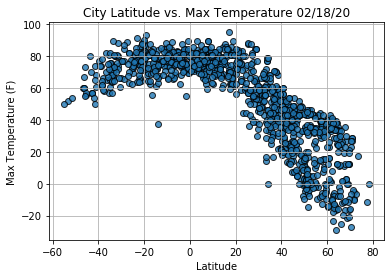

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs Humidity

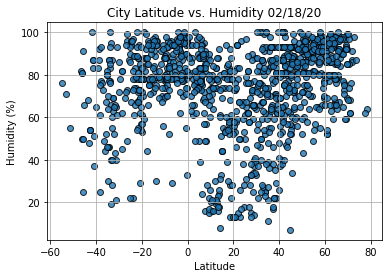

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Latitude vs Cloudiness

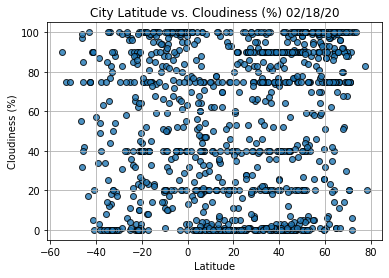

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Latitude vs Wind Speed

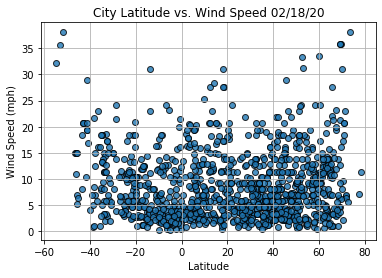

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()